In [82]:
import pandas as pd 


In [83]:
df1 = pd.read_csv('https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv')
df2 = pd.read_csv('https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv')
# concat the two dataframes
df = pd.concat([df1, df2], ignore_index=True)
df.head()
df.shape

(140000, 37)

In [84]:
# only keep row with only one 1 in the columns from admiration to neutral 
df = df[(df[['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']] == 1).sum(axis=1) == 1]

In [85]:
# shape of the df
df.shape

(113948, 37)

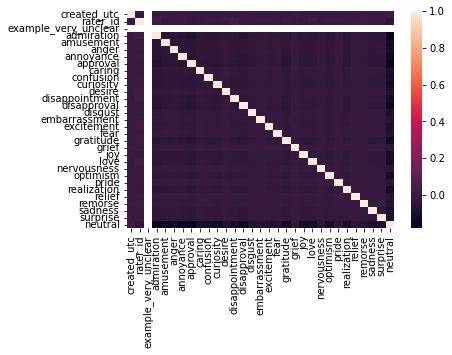

In [86]:
#We calculate Pearson correlation values between each pair of emotions and plot the correlation matrix using seaborn heatmap.

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()



In [87]:
# list the subreddits
l_subreddit= df['subreddit'].unique()

In [88]:
# find the l_subreddit with the most number of posts
l_subreddit_count = df['subreddit'].value_counts()
l_subreddit_count

cringe              484
AnimalsBeingBros    464
loveafterlockup     459
TheSimpsons         454
90DayFiance         453
                   ... 
TeamSolomid          74
Anticonsumption      64
darknet              64
shieldbro            58
farcry               50
Name: subreddit, Length: 483, dtype: int64

In [89]:
# suppress row where example_very_unclear is True
df = df[df['example_very_unclear'] == False]



In [90]:
df.columns

Index(['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
       'created_utc', 'rater_id', 'example_very_unclear', 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

In [91]:
# create a list of the columns but exclude 'text', 'id', 'author', 'subreddit', 'link_id', 'parent_id','created_utc', 'rater_id', 'example_very_unclear'
emotions = [col for col in df.columns if col not in ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id','created_utc', 'rater_id', 'example_very_unclear']]

In [92]:
# lower case text 
df['text'] = df['text'].str.lower()

In [93]:
emotions

['admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise',
 'neutral']

In [94]:
# create a column for with the emotions 
df['emotions'] = df[emotions].idxmax(axis=1)

In [95]:
df.head(10)

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,emotions
0,that game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,1,0,0,sadness
2,"you do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,1,neutral
3,man i love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,0,0,0,0,0,0,0,0,0,love
4,"[name] was nowhere near them, he was by the fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,1,neutral
5,right? considering it’s such an important docu...,eespn2i,ImperialBoss,TrueReddit,t3_aizyuz,t1_eesoak0,1.548280e+09,61,False,0,...,0,0,0,0,0,0,0,0,0,gratitude
6,"he isn't as big, but he's still quite popular....",eczuekb,Rallings,cringe,t3_abeksv,t1_eczsmp8,1.546320e+09,3,False,0,...,0,0,0,0,0,0,0,0,0,disapproval
7,that's crazy; i went to a super [religion] hig...,ed5tx8y,Beachy5313,TeenMomOGandTeenMom2,t3_ac10u9,t1_ed5tfyc,1.546536e+09,23,False,0,...,0,0,0,0,0,0,0,0,0,amusement
8,that's adorable asf,ef961hv,RedRails1917,traaaaaaannnnnnnnnns,t3_akz2ia,t3_akz2ia,1.548764e+09,73,False,0,...,0,0,0,0,0,0,0,0,0,amusement
9,"""sponge blurb pubs quaw haha gurr ha aaa!"" fin...",edl7cr3,Tiagulus,youtubehaiku,t3_acuvb0,t1_edc21ip,1.546984e+09,54,False,0,...,0,0,0,0,0,0,0,0,0,amusement
10,"i have, and now that you mention it, i think t...",ed9w1hm,[deleted],AskMenOver30,t3_acm7f6,t1_ed9m2l0,1.546658e+09,36,False,0,...,0,0,0,0,0,0,0,0,1,neutral


In [96]:
# create a new dataframe with text and emotions
df_emo = df[['text', 'emotions']]

In [97]:
df_emo.head()

,text,emotions
0,that game hurt.,sadness
2,"you do right, if you don't care then fuck 'em!",neutral
3,man i love reddit.,love
4,"[name] was nowhere near them, he was by the fa...",neutral
5,right? considering it’s such an important docu...,gratitude


In [98]:
df_emo['emotions'].value_counts()

neutral           36682
approval           7474
admiration         7011
annoyance          5530
disapproval        5094
gratitude          4707
amusement          4083
curiosity          3889
anger              3447
love               3305
confusion          3267
disappointment     3171
realization        3112
optimism           3038
joy                2844
sadness            2470
caring             2326
surprise           2283
excitement         2004
disgust            1899
desire             1401
fear               1185
remorse             995
embarrassment       980
relief              539
nervousness         529
pride               454
grief               229
Name: emotions, dtype: int64

In [99]:
# plot with bokeh
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap
# import a palette with 30 colors 
from bokeh.palettes import Category20b  

from bokeh.layouts import gridplot

output_notebook()

# create a dataframe with the emotions and the count
df_emo_count = df_emo['emotions'].value_counts().reset_index()
df_emo_count.columns = ['emotions', 'count']

# create a column source
source = ColumnDataSource(df_emo_count)

# create a figure
p = figure(x_range=df_emo_count['emotions'], plot_height=350, title="Emotions",
              toolbar_location=None, tools="")
p.vbar(x='emotions', top='count', width=0.9, source=source,
         line_color='white', fill_color=factor_cmap('emotions', palette=Category20b[20], factors=sorted(df_emo_count['emotions'].unique())))

p.xgrid.grid_line_color = None  
p.y_range.start = 0
p.y_range.end = 10000
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None
p.xaxis.axis_label = 'Emotions'
p.yaxis.axis_label = 'Count'

# create a hover tool
hover = HoverTool()
hover.tooltips = [
    ("Emotions", "@emotions"),
    ("Count", "@count"),
]
p.add_tools(hover)

show(p)


Loading BokehJS ...

In [100]:
#pip install textblob 

In [101]:
from textblob import TextBlob

In [102]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment == 0:
        return 'neutral'
    else:
        return 'negative'

In [103]:
get_sentiment("I love coding in Corea")

'positive'

In [104]:
df_emo['sentiment'] = df_emo['text'].apply(get_sentiment)

C:\Users\MYRA-L~1\AppData\Local\Temp/ipykernel_16656/58986690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emo['sentiment'] = df_emo['text'].apply(get_sentiment)


In [105]:
df_emo.head()

,text,emotions,sentiment
0,that game hurt.,sadness,negative
2,"you do right, if you don't care then fuck 'em!",neutral,negative
3,man i love reddit.,love,positive
4,"[name] was nowhere near them, he was by the fa...",neutral,positive
5,right? considering it’s such an important docu...,gratitude,positive


In [106]:
# emotion vs sentiment 
df_emo_count = df_emo.groupby(['emotions', 'sentiment']).size()
df_emo_count

emotions    sentiment
admiration  negative      456
            neutral       853
            positive     5702
amusement   negative      466
            neutral       483
                         ... 
sadness     neutral       575
            positive      532
surprise    negative      536
            neutral       759
            positive      988
Length: 84, dtype: int64

c:\Users\Myra-Louise\anaconda3_1\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\Myra-Louise\anaconda3_1\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'sadness'),
  Text(1, 0, 'neutral'),
  Text(2, 0, 'love'),
  Text(3, 0, 'gratitude'),
  Text(4, 0, 'disapproval'),
  Text(5, 0, 'amusement'),
  Text(6, 0, 'disappointment'),
  Text(7, 0, 'realization'),
  Text(8, 0, 'admiration'),
  Text(9, 0, 'annoyance'),
  Text(10, 0, 'confusion'),
  Text(11, 0, 'optimism'),
  Text(12, 0, 'excitement'),
  Text(13, 0, 'caring'),
  Text(14, 0, 'remorse'),
  Text(15, 0, 'joy'),
  Text(16, 0, 'approval'),
  Text(17, 0, 'embarrassment'),
  Text(18, 0, 'surprise'),
  Text(19, 0, 'curiosity'),
  Text(20, 0, 'anger'),
  Text(21, 0, 'grief'),
  Text(22, 0, 'disgust'),
  Text(23, 0, 'pride'),
  Text(24, 0, 'desire'),
  Text(25, 0, 'relief'),
  Text(26, 0, 'fear'),
  Text(27, 0, 'nervousness')])

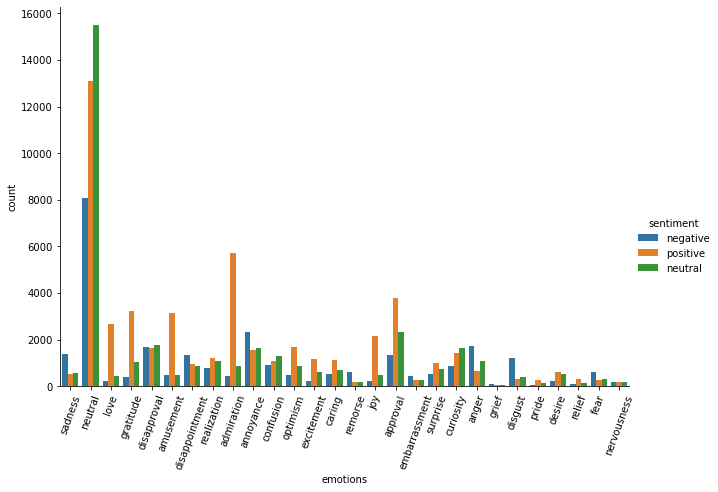

In [107]:
# import seaborn
import seaborn as sns

# factorplot and catplot weidth is big 

# create a factorplot
sns.factorplot(x='emotions', hue='sentiment', data=df_emo, kind='count', size=6, aspect=1.5)
# axis labels rotation
import matplotlib.pyplot as plt
plt.xticks(rotation=70)




cleaning 

In [108]:
import neattext as nfx


In [109]:
dir(nfx)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

In [110]:
import nltk

In [111]:
# using nltk functions clean the df_emo
df_emo['text_cleaned'] = df_emo['text'].apply(nfx.remove_stopwords)
df_emo['text_cleaned'] = df_emo['text'].apply(nfx.remove_punctuations)
df_emo['text_cleaned'] = df_emo['text'].apply(nfx.remove_special_characters)
df_emo['text_cleaned'] = df_emo['text'].apply(nfx.remove_html_tags)
df_emo['text_cleaned'] = df_emo['text'].apply(nfx.remove_urls)
df_emo['text_cleaned'] = df_emo['text'].apply(nfx.remove_emojis)




C:\Users\MYRA-L~1\AppData\Local\Temp/ipykernel_16656/3733783313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emo['text_cleaned'] = df_emo['text'].apply(nfx.remove_stopwords)
C:\Users\MYRA-L~1\AppData\Local\Temp/ipykernel_16656/3733783313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emo['text_cleaned'] = df_emo['text'].apply(nfx.remove_punctuations)
C:\Users\MYRA-L~1\AppData\Local\Temp/ipykernel_16656/3733783313.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [112]:
# keep df with clean text
df_emo_clean = df_emo[['text_cleaned', 'emotions']]

In [113]:
# load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# vectorizer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix, plot_confusion_matrix

In [114]:
# split the dataset 
from sklearn.model_selection import train_test_split


# build features from our text 

In [115]:
X = df_emo_clean['text_cleaned']
y = df_emo_clean['emotions']

In [116]:
# vectorize the text
cv = CountVectorizer()
X = cv.fit_transform(X)

In [117]:
# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
# build the model 
nv_model = MultinomialNB()

# use cross validation 
from sklearn.model_selection import cross_val_score
nv_score = cross_val_score(nv_model, X_train, y_train, cv=10)
print(nv_score)
print("mean of the score", nv_score.mean())

# fit the model
nv_model.fit(X_train, y_train)


[0.37121545 0.37088635 0.37220272 0.3649627  0.36540149 0.37066696
 0.37154454 0.36978938 0.36840373 0.37059792]
mean of the score 0.369567123756534


MultinomialNB()

In [119]:
# use other model


Our accuracy is similar in all the folds, the data is consistent. If we had very different score, this could indicate that our data have a problem

In [120]:
# accuracy score
# methode 1 
print("Accuracy Score: ", nv_model.score(X_test, y_test))

Accuracy Score:  0.3696796840719614


In [121]:
y_pred_vn = nv_model.predict(X_test)

In [122]:
 # make a single prediction 
# vectorize the text
# applied the model

In [123]:
example = ["I love coding in Corea"]
example_vector = cv.transform(example).toarray()
nv_model.predict(example_vector)

array(['love'], dtype='<U14')

In [124]:
nv_model.classes_

array(['admiration', 'amusement', 'anger', 'annoyance', 'approval',
       'caring', 'confusion', 'curiosity', 'desire', 'disappointment',
       'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
       'gratitude', 'grief', 'joy', 'love', 'nervousness', 'neutral',
       'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness',
       'surprise'], dtype='<U14')

In [125]:
nv_model.predict_proba(example_vector)

array([[7.59847448e-02, 1.12621376e-02, 4.94276707e-03, 1.32655107e-02,
        2.71913543e-02, 6.96923096e-03, 5.60364505e-03, 8.13261722e-03,
        3.09268094e-03, 3.69855911e-03, 1.02492456e-02, 1.45700707e-03,
        5.38689709e-04, 8.79238377e-03, 9.15235445e-04, 7.22855108e-03,
        2.57650023e-05, 2.80481258e-02, 4.81844733e-01, 1.28091342e-04,
        2.68873448e-01, 1.05774730e-02, 1.34186187e-04, 1.60919838e-02,
        8.11044046e-05, 4.26894130e-04, 2.71591101e-03, 1.72792383e-03]])

In [126]:
# make the correspondance between the classes and the confidance score
for i in range(len(nv_model.classes_)):
    l_confi_score = nv_model.classes_[i], nv_model.predict_proba(example_vector)[0][i]
    print(l_confi_score)

# methode 2

('admiration', 0.07598474483222317)
('amusement', 0.011262137584120582)
('anger', 0.004942767065527926)
('annoyance', 0.013265510725843302)
('approval', 0.027191354331767507)
('caring', 0.006969230961069526)
('confusion', 0.005603645046539674)
('curiosity', 0.008132617223223651)
('desire', 0.0030926809374624636)
('disappointment', 0.0036985591090020133)
('disapproval', 0.010249245601993372)
('disgust', 0.0014570070747095913)
('embarrassment', 0.000538689708690499)
('excitement', 0.008792383770072939)
('fear', 0.0009152354447330801)
('gratitude', 0.007228551084676421)
('grief', 2.5765002258613413e-05)
('joy', 0.02804812579157135)
('love', 0.4818447333604935)
('nervousness', 0.00012809134205885793)
('neutral', 0.2688734476907199)
('optimism', 0.010577472989162973)
('pride', 0.0001341861872941967)
('realization', 0.016091983766830423)
('relief', 8.110440459395987e-05)
('remorse', 0.0004268941297206439)
('sadness', 0.002715911005785257)
('surprise', 0.0017279238278534806)


In [127]:
# highest confidance score with the emotion associated

In [128]:
import numpy as np

In [129]:
max = np.max(nv_model.predict_proba(example_vector))

# find in the list l_confi_score the corresponding sentiment 
for i in range(len(nv_model.classes_)):
    l_confi_score = nv_model.classes_[i], nv_model.predict_proba(example_vector)[0][i]
    if l_confi_score[1] == max:
        print(l_confi_score)

            

('love', 0.4818447333604935)


this model predict better the love sentiment 

In [130]:
def prediction (text, model):
    text_vector = cv.transform(text).toarray()
    prediction = model.predict(text_vector)
    pred_proba = model.predict_proba(text_vector)
    pred_all = dict(zip(model.classes_, pred_proba[0]))
    print (prediction[0])
    print("The sentiment is: ",prediction[0],"\n the prediction score is",np.max(pred_proba))
    return pred_all



In [131]:
prediction(example, nv_model)

love
The sentiment is:  love 
 the prediction score is 0.4818447333604935


{'admiration': 0.07598474483222317,
 'amusement': 0.011262137584120582,
 'anger': 0.004942767065527926,
 'annoyance': 0.013265510725843302,
 'approval': 0.027191354331767507,
 'caring': 0.006969230961069526,
 'confusion': 0.005603645046539674,
 'curiosity': 0.008132617223223651,
 'desire': 0.0030926809374624636,
 'disappointment': 0.0036985591090020133,
 'disapproval': 0.010249245601993372,
 'disgust': 0.0014570070747095913,
 'embarrassment': 0.000538689708690499,
 'excitement': 0.008792383770072939,
 'fear': 0.0009152354447330801,
 'gratitude': 0.007228551084676421,
 'grief': 2.5765002258613413e-05,
 'joy': 0.02804812579157135,
 'love': 0.4818447333604935,
 'nervousness': 0.00012809134205885793,
 'neutral': 0.2688734476907199,
 'optimism': 0.010577472989162973,
 'pride': 0.0001341861872941967,
 'realization': 0.016091983766830423,
 'relief': 8.110440459395987e-05,
 'remorse': 0.0004268941297206439,
 'sadness': 0.002715911005785257,
 'surprise': 0.0017279238278534806}

In [132]:
prediction(["I hate dogs"],nv_model)

neutral
The sentiment is:  neutral 
 the prediction score is 0.3060009967731973


{'admiration': 0.018951866696088223,
 'amusement': 0.02009064148248819,
 'anger': 0.19174766243792635,
 'annoyance': 0.11981891222636035,
 'approval': 0.03655541662101922,
 'caring': 0.009450664270826895,
 'confusion': 0.006246297610990717,
 'curiosity': 0.004118042855494989,
 'desire': 0.0004804148183181995,
 'disappointment': 0.011732953295396023,
 'disapproval': 0.08725303213808563,
 'disgust': 0.052575471488809124,
 'embarrassment': 0.00409697167271468,
 'excitement': 0.0031283410475896126,
 'fear': 0.0004613404014753599,
 'gratitude': 0.011045172918739972,
 'grief': 0.00045735054160686144,
 'joy': 0.0037550466781362873,
 'love': 0.06521162822622321,
 'nervousness': 0.0014467086420855016,
 'neutral': 0.3060009967731973,
 'optimism': 0.01618731530363482,
 'pride': 0.0005204924381999617,
 'realization': 0.01820723607730221,
 'relief': 0.0010215090388866243,
 'remorse': 0.0015035463137267114,
 'sadness': 0.0037513860313775353,
 'surprise': 0.0041835819532984354}

# model evaluation 

In [133]:
# classification report 
print(classification_report(y_test, y_pred_vn))

c:\Users\Myra-Louise\anaconda3_1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    admiration       0.45      0.36      0.40      1383
     amusement       0.51      0.21      0.30       819
         anger       0.36      0.09      0.14       667
     annoyance       0.19      0.05      0.08      1115
      approval       0.24      0.08      0.12      1460
        caring       0.32      0.04      0.07       460
     confusion       0.34      0.03      0.06       660
     curiosity       0.32      0.05      0.08       786
        desire       0.57      0.01      0.02       325
disappointment       0.18      0.02      0.04       632
   disapproval       0.21      0.05      0.08      1042
       disgust       0.54      0.05      0.09       382
 embarrassment       0.00      0.00      0.00       191
    excitement       0.33      0.03      0.05       397
          fear       0.80      0.03      0.06       256
     gratitude       0.78      0.59      0.67       976
         grief       0.00      0.00      0.00  

c:\Users\Myra-Louise\anaconda3_1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Myra-Louise\anaconda3_1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c:\Users\Myra-Louise\anaconda3_1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


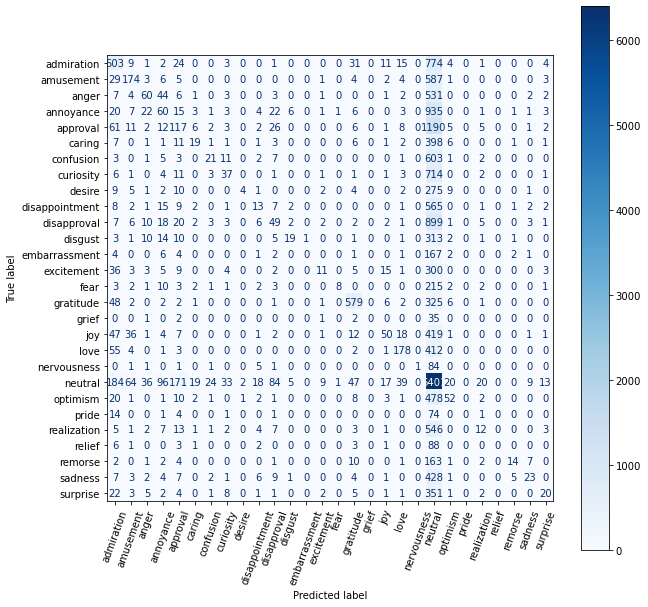

In [134]:
# confusion matrix : true label vs predicted label
confusion_matrix(y_test, y_pred_vn)

# plot confusion matrix
plot_confusion_matrix(nv_model, X_test, y_test, cmap=plt.cm.Blues)
# rotate the legend of the x axis 
plt.xticks(rotation=70)
# reduce the size of the bar 
plt.gcf().set_size_inches(10, 10)

# model interpration 

In [135]:
# logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


c:\Users\Myra-Louise\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [136]:
# accuracy 
lr_model.score(X_test, y_test)


0.41412900394910046

In [137]:
# compute the accuracy score with cross validation
lr_score = cross_val_score(lr_model, X_train, y_train, cv=10)
print(lr_score)
print("mean of the score", lr_score.mean())


c:\Users\Myra-Louise\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Myra-Louise\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[0.42617376 0.41981132 0.4125713  0.41366828 0.41311979 0.41695919
 0.41026766 0.41553313 0.41382337 0.41985738]
mean of the score 0.41617851777913584


c:\Users\Myra-Louise\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [138]:
# single prediction
prediction(["I hate dogs"],lr_model)

neutral
The sentiment is:  neutral 
 the prediction score is 0.28707242220524465


{'admiration': 0.012370023303115752,
 'amusement': 0.00548160803397843,
 'anger': 0.23512499767306808,
 'annoyance': 0.0754920822517611,
 'approval': 0.040955585717638895,
 'caring': 0.0183655505413113,
 'confusion': 0.009816561704182974,
 'curiosity': 0.009940315712279043,
 'desire': 0.0017516199966852253,
 'disappointment': 0.017643530916330707,
 'disapproval': 0.12308067795956266,
 'disgust': 0.04904182459599393,
 'embarrassment': 0.01116941699588371,
 'excitement': 0.01019486141177351,
 'fear': 0.0014655867832281447,
 'gratitude': 0.0007675839781376775,
 'grief': 0.0024488208995080926,
 'joy': 0.004355213458650454,
 'love': 0.0030691710261493044,
 'nervousness': 0.0054548304193585695,
 'neutral': 0.28707242220524465,
 'optimism': 0.01956331425980093,
 'pride': 0.003152061061820386,
 'realization': 0.01998715833491443,
 'relief': 0.008013651155185068,
 'remorse': 0.0032331706696197876,
 'sadness': 0.009213139659817971,
 'surprise': 0.011775219274999261}

In [139]:
#pip install eli5

In [140]:
# interpret the model 
import eli5

In [141]:
# show the wieghts for each label 
eli5.show_weights(lr_model, vec=cv, top=30)

c:\Users\Myra-Louise\anaconda3_1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [142]:
feature_names = cv.get_feature_names()

In [143]:
eli5.show_weights(lr_model,feature_names = feature_names, top=30)

In [144]:
from sklearn.pipeline import Pipeline

# create a pipeline use the logistic regression model   
pipe_lr = Pipeline(steps=[('cv', CountVectorizer()),('lr', LogisticRegression())])

In [145]:

pipe_lr = pipe_lr.fit(X_train, y_train)

AttributeError: lower not found

In [ ]:
pipe_lr.score(X_test, y_test)

In [ ]:
example = "I hate dogs"

In [ ]:
pipe_lr.predict([example])

In [ ]:
# make a prediction 
pipe_lr.predict([example])

In [ ]:
# make KNN model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# accuracy
print("knn score",knn_model.score(X_test, y_test))

# make a prediction
print("\nknn predict score",prediction(["I wish i could stay longer"],knn_model))

# make a prediction
print("\nnv_novel score",prediction(["I wish i could stay longer"],nv_model))

# make a prediction
print("\nlr",prediction(["I wish i could stay longer"],lr_model))



# test for inbalanced class

In [ ]:
import pandas 

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
# import linrary


xgb_model = XGBClassifier().fit(X_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(X_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)
print("xgb score", xgb_score)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
kf = KFold(n_splits=4)
mae_train = []
mae_test = []
for train_index, test_index in kf.split(X):
    
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y[train_index], y[test_index]
   model = KNeighborsClassifier(n_neighbors=2)
   model.fit(X_train, y_train)
   y_train_pred = model.predict(X_train)
   y_test_pred = model.predict(X_test)
   mae_train.append(mean_absolute_error(y_train, y_train_pred))
   mae_test.append(mean_absolute_error(y_test, y_test_pred))

In [ ]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()